<a href="https://colab.research.google.com/github/Harjot0013/Health-Predictive-System/blob/main/Project_Dibetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INSTALLING PANDAS PROFILLING**

In [ ]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=5f4e44ef82ba152cc643fa36486d30592dc17041805e0bccf8acec1af28cbe10
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


**Importing all Useable Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from ydata_profiling import ProfileReport

**Data Collection and Analysis**


In [ ]:
#loading the diabetes dataset to a pandas dataframe
df=pd.read_csv("/content/diabetes (1).csv")



In [ ]:
## printing first five rows of the dataset
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
# number of rows and columns by shape
df.shape

(768, 9)

In [ ]:
# getting the statistical measures of the data
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
df["Outcome"].value_counts()
# there is imbalancing of data(class imbalance )

Outcome
0    500
1    268
Name: count, dtype: int64

**0--> non diabetic**
**1-->diabetic**

In [ ]:
df.groupby("Outcome").mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

In [ ]:
# checking for mssing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**DATA PREPROCESSING**

**AND**

**DATA VISUALIZATION**

In [ ]:
profile=ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

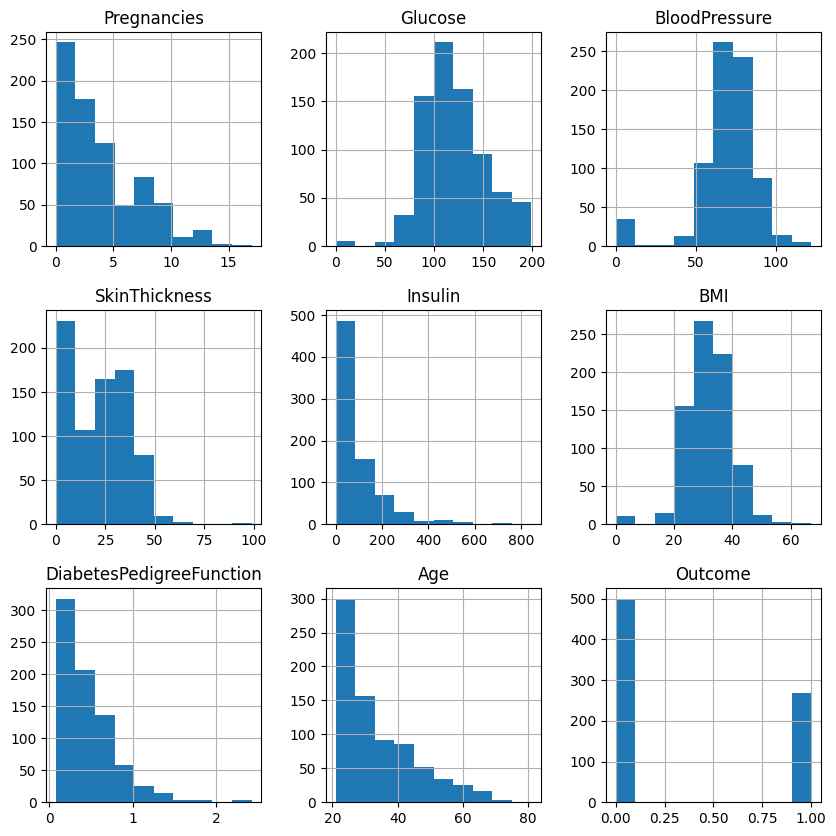

In [ ]:
# creating the histograms for all column
import matplotlib.pyplot as plt
df.hist(figsize=(10,10))
plt.show()

**OUTLIERS DETECTION**

**AND**

**OUTLIERS REMOVAL**

In [ ]:
continous_features=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

Q1 = df[continous_features].quantile(0.25) #Calculate the first quartile (25th percentile)
Q3 = df[continous_features].quantile(0.75)#third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers_count = ((df[continous_features] < (Q1 - 1.5 * IQR)) | (df[continous_features] > (Q3 + 1.5 * IQR))).sum()
outliers_count

Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
dtype: int64

To handle outliers
iam using (Cap Outliers)-This method caps the outliers to the lower and upper bounds.
Cap Outliers: This method preserves all data points while reducing the impact of extreme values. It's a good balance between removing outliers and keeping the data intact.
Cap Outliers: Adjust values that fall outside the bounds to the nearest bound.

In [ ]:
# Cap outliers
df_capped = df.copy()
for feature in continous_features:
    df_capped[feature] = np.where(df_capped[feature] < lower_bound[feature], lower_bound[feature], df_capped[feature])
    df_capped[feature] = np.where(df_capped[feature] > upper_bound[feature], upper_bound[feature], df_capped[feature])

print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after capping outliers: {df_capped.shape}")

Original dataset shape: (768, 9)
Dataset shape after capping outliers: (768, 9)


In [ ]:
df_capped.shape

(768, 9)

**SPLITTING FEATURES AND TARGET**

In [ ]:
# seperting the data and labels
X=df_capped.drop(columns='Outcome',axis=1)
y=df_capped['Outcome']

**Data Standardization**



In [ ]:
scaler=StandardScaler()
standardized_data=scaler.fit_transform(X)

In [ ]:
joblib.dump(scaler, 'scaler.pkl')

In [ ]:
print(standardized_data)

[[ 0.64714967  0.86192556  0.09269135 ...  0.20935933  0.58892732
   1.44569096]
 [-0.84896998 -1.15943299 -0.33020145 ... -0.78425421 -0.37810147
  -0.189304  ]
 [ 1.24559754  1.98490253 -0.47116571 ... -1.25267202  0.74659506
  -0.10325164]
 ...
 [ 0.34792574 -0.00437096  0.09269135 ... -0.84103213 -0.74949659
  -0.27535637]
 [-0.84896998  0.15605432 -0.75309424 ... -0.28744744 -0.38510892
   1.18753386]
 [-0.84896998 -0.90275254 -0.04827292 ... -0.24486401 -0.50423566
  -0.87772293]]


In [ ]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
!pip install imblearn

In [ ]:
# using technique(OVER SAMPLING MINORITY CLASS USING SMOTE) to
# handle imbalance data
from imblearn.over_sampling import SMOTE

# Check the shapes of X and y before applying SMOTE
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)

Shape of X: (768, 8)
Shape of y: (768,)


In [ ]:
y_sm.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

**Train_test_SPLIT**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,stratify=y_sm,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (800, 8) (200, 8)


In [ ]:
print(y.shape,y_train.shape,y_test.shape)

(768,) (800,) (200,)


**MODEL SELECTION**

In [ ]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

def find_best_classification_model_using_gridsearchcv(X, y):
    algos = {
        "logistic_regression": {
            'model': LogisticRegression(max_iter=1000),
            'params': {
                'C': [1, 5, 10],
                'solver': ['lbfgs', 'newton-cg', 'liblinear'],
                'penalty': ['l2', 'none']
            }
        },
        "random_forest": {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [10, 50, 100],
                'criterion': ['gini', 'entropy']
            }
        },
        "SVM": {
            'model': svm.SVC(gamma='auto'),
            'params': {
                'C': [1, 10, 20],
                'kernel': ['rbf', 'linear']
            }
        },
        "KNN": {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [5, 10, 15],
                'algorithm': ['ball_tree', 'kd_tree', 'auto'],
                'p': [1, 2]
            }
        },
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example usage (assuming X and y are defined):
# results = find_best_classification_model_using_gridsearchcv(X, y)
# print(results)
find_best_classification_model_using_gridsearchcv(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

model  best_score  \
0  logistic_regression    0.783117   
1        random_forest    0.777922   
2                  SVM    0.777922   
3                  KNN    0.764935   

                                         best_params  
0       {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}  
1       {'criterion': 'entropy', 'n_estimators': 50}  
2                       {'C': 1, 'kernel': 'linear'}  
3  {'algorithm': 'ball_tree', 'n_neighbors': 15, ...

In [ ]:
# therefore we will use logistic regression for fit our classifier

**TRAINING the Model**

In [ ]:
model=LogisticRegression(C=1,penalty='l2',solver='lbfgs')


In [ ]:
# training the support vector machine classifier
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

**Model evaluation**

**Accuracy score**

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction,y_train)

In [ ]:
print(" Accuracy score of the training data:",training_data_accuracy)

 Accuracy score of the training data: 0.75


In [ ]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction,y_test)

In [ ]:
print(" Accuracy score of the test data:",test_data_accuracy)

 Accuracy score of the test data: 0.755


random forest

In [ ]:
model_1=RandomForestClassifier(n_estimators=50,criterion='gini')

In [ ]:
model_1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
# accuracy score on the training data
X_train_prediction_1 = model_1.predict(X_train)
training_data_accuracy_1= accuracy_score(X_train_prediction_1,y_train)

In [ ]:
print(" Accuracy score of the training data:",training_data_accuracy)

 Accuracy score of the training data: 0.75


In [ ]:
# accuracy score on the test data
X_test_prediction_1 = model_1.predict(X_test)
test_data_accuracy_1= accuracy_score(X_test_prediction_1,y_test)

In [ ]:
print(" Accuracy score of the test data:",test_data_accuracy_1)

 Accuracy score of the test data: 0.82


** MAKE A predictive System**

In [ ]:
input_data=(5,166,72,19,175,25.8,0.587,51)

#changing the input_data to numpy as
input_data_as_numpy_array=np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#standardize the data
std_data=scaler.transform(input_data_reshaped)
print(std_data)

prediction=model.predict(std_data)
print(prediction)

if prediction[0]==0:
  print("The person is not diabetic")
else:
  print("The person is diabetic")



[[ 0.34792574  1.43945657  0.09269135 -0.09547039  1.0837538  -0.89781004
   0.44877822  1.53174333]]
[0]
The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**CONFUSION_MATRIX**

**AND**
**CLASSIFICATION REPORT**

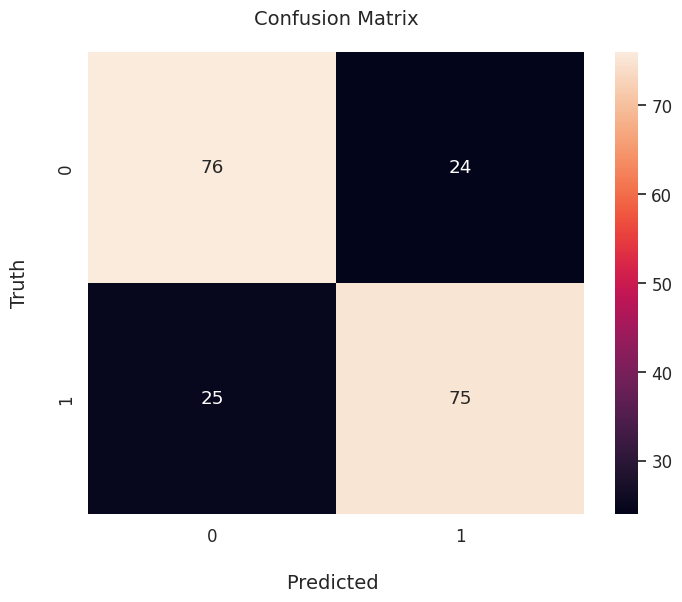

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have predictions (y_pred) and true labels (y_true)
conf_matrix = confusion_matrix(y_test, X_test_prediction)

# Set up the plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.1)  # Scale up the size of all text

# Plot the confusion matrix using Seaborn heatmap
ax = sns.heatmap(conf_matrix, annot=True, fmt='d')

# Customize axes labels
ax.set_xlabel("Predicted ", fontsize=14, labelpad=20)
ax.set_ylabel("Truth", fontsize=14, labelpad=20)
ax.set_title("Confusion Matrix", fontsize=14, pad=20)

# Show the plot
plt.show()

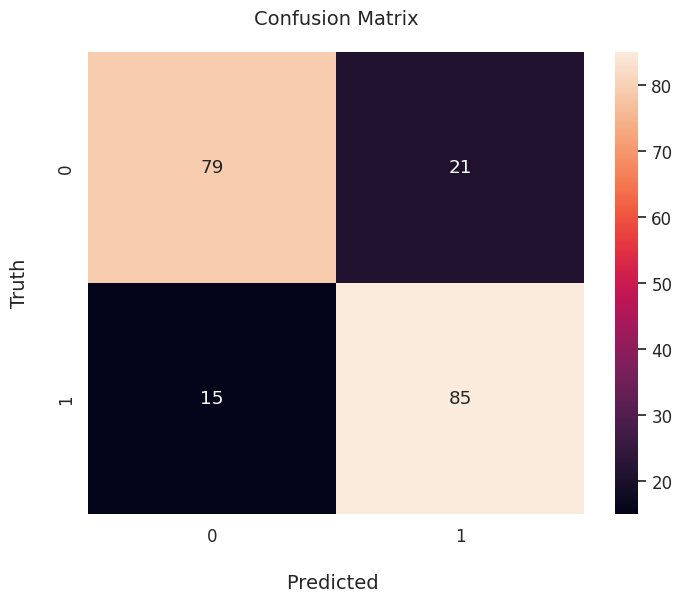

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have predictions (y_pred) and true labels (y_true)
conf_matrix = confusion_matrix(y_test, X_test_prediction_1)

# Set up the plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.1)  # Scale up the size of all text

# Plot the confusion matrix using Seaborn heatmap
ax = sns.heatmap(conf_matrix, annot=True, fmt='d')

# Customize axes labels
ax.set_xlabel("Predicted ", fontsize=14, labelpad=20)
ax.set_ylabel("Truth", fontsize=14, labelpad=20)
ax.set_title("Confusion Matrix", fontsize=14, pad=20)

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       100
           1       0.76      0.75      0.75       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,X_test_prediction_1))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       100
           1       0.80      0.85      0.83       100

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



**SAVING THE MODEL**

In [ ]:
import pickle
filename='diabetes_model_log.sav'
pickle.dump(model,open(filename,'wb'))

In [ ]:
import pickle
filename='front.pkl'
pickle.dump(model_1,open(filename,'wb'))